In [300]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [301]:
#read in csv
def read_csv(path, strDate, strDateFormat):
    intSuccess = 0
    if strDateFormat != '':
        df = pd.read_csv(path, delimiter=',')
        df = df.iloc[0:35]
        df[strDate] = pd.to_datetime(datetime.strptime(df[strDate]+strDateFormat), '%Y-%m-%d')
        df.set_index(strDate, drop=True, inplace=True)

    else:
        df = pd.read_csv(path,delimiter=',',parse_dates = True,
            infer_datetime_format = True,
            index_col = strDate
            )
        df.index = pd.to_datetime(df.index, format='%Y-%m')
    if df.count != 0:
        intSuccess = 1
    return df, intSuccess

In [302]:
def create_Monthly_Avg(path, strDate, idxColumn):
    df = pd.read_csv(path,delimiter=',')
    df['YearMonth'] = pd.to_datetime(df[strDate]).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))
    df['YearMonth'] =pd.to_datetime(df.YearMonth)
    res = df.groupby('YearMonth')[idxColumn].mean()
    return res

In [303]:
def show_plot_twoYs (df, colName0, colName1, colName2, fileName):
    #create two axis
    # create figure and axis objects with subplots()
    fig,ax = plt.subplots(figsize=(30,10))
    # make a plot
    ax.plot(df.index, df[colName1], color="red", marker="o")
    # set x-axis label
    ax.set_xlabel('Date',fontsize=14)
    # set y-axis label
    ax.set_ylabel(colName1,color="red",fontsize=14)
    
    # twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(df.index, df[colName2],color="blue",marker="o")
    ax2.set_ylabel(colName2,color="blue",fontsize=14)
    plt.show()
    # save the plot as a file
    fig.savefig(fileName + '.jpg',
                format='jpeg',
                dpi=100,
                bbox_inches='tight')

#     #create multiple axes
#     fig, ax = plt.subplots()
#     ax3 = ax.twinx()
#     rspine = ax3.spines['right']
#     rspine.set_position(('axes', 1.15))
#     ax3.set_frame_on(True)
#     ax3.patch.set_visible(False)
#     fig.subplots_adjust(right=0.7)

#     df.A.plot(ax=ax, style='b-')
#     # same ax as above since it's automatically added on the right
#     df.B.plot(ax=ax, style='r-', secondary_y=True)
#     df.C.plot(ax=ax3, style='g-')

#     # add legend --> take advantage of pandas providing us access
#     # to the line associated with the right part of the axis
#     ax3.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0], ax3.get_lines()[0]],\
#                 ['A','B','C'], bbox_to_anchor=(1.5, 0.5))
    
#     #number of plots determined by number of features
#     df.plot.line(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)
#     #or number of plots determined by limiting number of features to say 10
#     df[:10].plot(kind = 'hist',subplots=True, layout = (3,4) ,legend=False,title = ['Ladder','SD of Ladder','Positive affect','Negative affect','Social support','Freedom','Corruption','Generosity','Log_GDP_per_capita',
#         'Health_Life_expect'])

In [304]:
#read in crude price
strFile = 'crude_wti_futures_history_data.csv'
# # p = Path('../Data')
# print(os.getcwd())
# # print(sys.argv[0])
# print(os.path.dirname(os.path.realpath('__file__')))
base_path = os.getcwd()
p = base_path + "\\data\\"
print(p)
# # dfCrudePrices, intSuccess = read_csv(Path(p,strFile), 'Date', '')
# dfMonlthlyPrices = create_Monthly_Avg(Path(p,strFile), 'Date', ['Price','Open','High','Low','Vol.'])
# if intSuccess == 1:
#     print(Path(p,strFile))
#     print(dfMonlthlyPrices.head())
# #     dfMonlthlyPrices.plot(figsize=(7,5))
# #     dfCrudePrices.plot(figsize=(7,5))
# else:
#     print('Tough luck sucker')

C:\Users\James McClure\Oil_Price_Prediction\data\


YearMonth
1960-01-01    100.991749
1960-02-01    101.002084
1960-03-01    100.925914
1960-04-01    100.765569
1960-05-01    100.540045
Name: USALORSGPNOSTSAM, dtype: float64


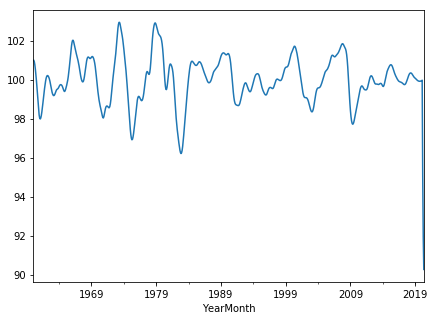

In [305]:
#read in GDP compare data
strFile = 'US_GDP_Monthly.csv'
base_path = os.getcwd()
p = base_path + "\\data\\"
# dfJoining, intSuccess = read_csv(Path(p,strFile), 'DATE', '')
dfJoining = create_Monthly_Avg(Path(p,strFile), 'DATE', 'USALORSGPNOSTSAM')
if intSuccess == 1:
    print(dfJoining.head())
    dfJoining.plot(figsize=(7,5))
else:
    print('Tough luck sucka')

In [306]:
#inner join the tables to the crude price table setting Date as index if Date column exists; if not, spit error
print(dfMonlthlyPrices.head())
# dfMonlthlyPrices
print(dfJoining.dtypes)

                Price       Open       High        Low
YearMonth                                             
2001-09-01  22.474000  23.138000  23.602000  21.612000
2001-10-01  22.212609  22.331739  22.693478  21.868696
2001-11-01  19.668000  19.813500  20.303000  19.116500
2001-12-01  19.403684  19.360000  19.917368  18.910000
2002-01-01  19.729048  19.793810  20.191429  19.297619
float64


In [307]:
#inner join on index
# joined_GDP_df= dfCrudePrices.join(dfJoining)
# joined_GDP_df= dfMonlthlyPrices.join(dfJoining)
joined_GDP_df = pd.concat([dfMonlthlyPrices, dfJoining], axis=1)
# joined_GDP_df = joined_GDP_df.dropna(inplace=True)
whereNotNull = joined_GDP_df.loc['2001-09':'2020-02']

In [308]:
#establish correlation
corrrelation    = whereNotNull.corr(method='pearson'); #'kendall', 'spearman', 'pearson'
print("Pearson correlation coefficient:");
print(corrrelation);
#very low correlation; pearson showed the highest

Pearson correlation coefficient:
                     Price      Open      High       Low  USALORSGPNOSTSAM
Price             1.000000  0.999924  0.999835  0.999894          0.314892
Open              0.999924  1.000000  0.999901  0.999824          0.315054
High              0.999835  0.999901  1.000000  0.999546          0.314254
Low               0.999894  0.999824  0.999546  1.000000          0.316303
USALORSGPNOSTSAM  0.314892  0.315054  0.314254  0.316303          1.000000


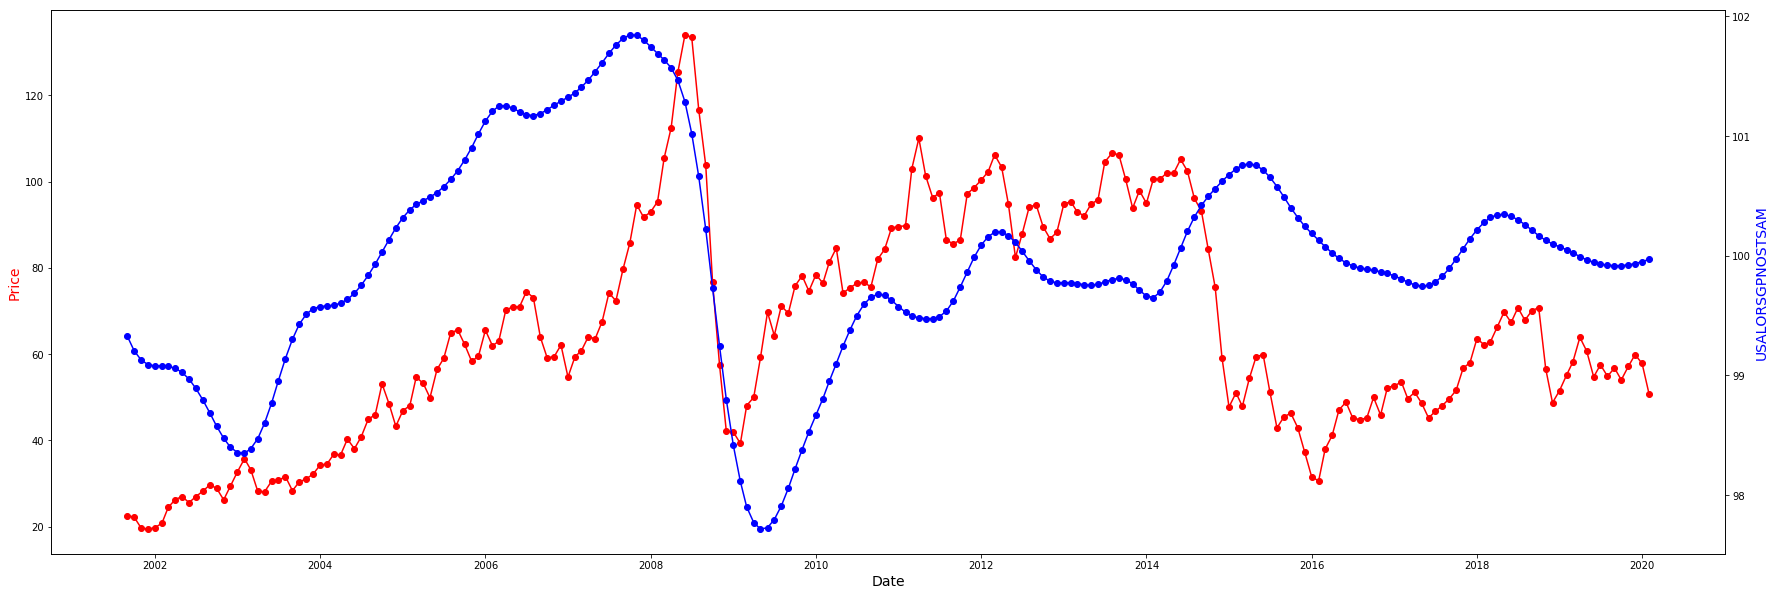

In [309]:
#check table shape
whereNotNull.head(10)
#plot the data
show_plot_twoYs (whereNotNull, whereNotNull.index, 'Price', 'USALORSGPNOSTSAM', 'GDP')

YearMonth
1983-01-01    8634
1983-02-01    8660
1983-03-01    8677
1983-04-01    8686
1983-05-01    8682
Name: value, dtype: int64


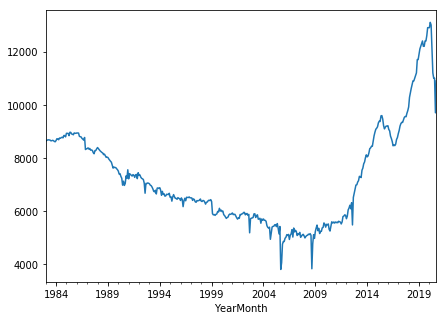

In [310]:
#read in US Oil Production compare data
strFile = 'us-crude-oil-production-historical-chart.csv'
base_path = os.getcwd()
p = base_path + "\\data\\"
# dfJoining, intSuccess = read_csv(Path(p,strFile), 'date', '')
dfJoining = create_Monthly_Avg(Path(p,strFile), 'date', 'value')
if intSuccess == 1:
    print(dfJoining.head())
    dfJoining.plot(figsize=(7,5))
else:
    print('Tough luck sucka')

In [311]:
#inner join on index
# joined_Oil_Production_df= pd.merge(dfCrudePrices, dfJoining, left_index=True, right_index=True, how='inner')
# joined_Oil_Production_df.head(300) 
joined_GDP_df = pd.concat([dfMonlthlyPrices, dfJoining], axis=1)
whereNotNull = joined_GDP_df.loc['2001-09':'2020-02']

In [320]:
#establish correlation
corrrelation    = whereNotNull.corr(method='pearson'); #'kendall', 'spearman', 'pearson'
print("Pearson correlation coefficient:");
print(corrrelation);
#very low correlation; pearson showed the highest; 1 = perfect positive correlation; -1 perfect negative correlation

Pearson correlation coefficient:
          Price      Open      High       Low     value
Price  1.000000  0.999924  0.999835  0.999894 -0.111260
Open   0.999924  1.000000  0.999901  0.999824 -0.110248
High   0.999835  0.999901  1.000000  0.999546 -0.113843
Low    0.999894  0.999824  0.999546  1.000000 -0.106842
value -0.111260 -0.110248 -0.113843 -0.106842  1.000000


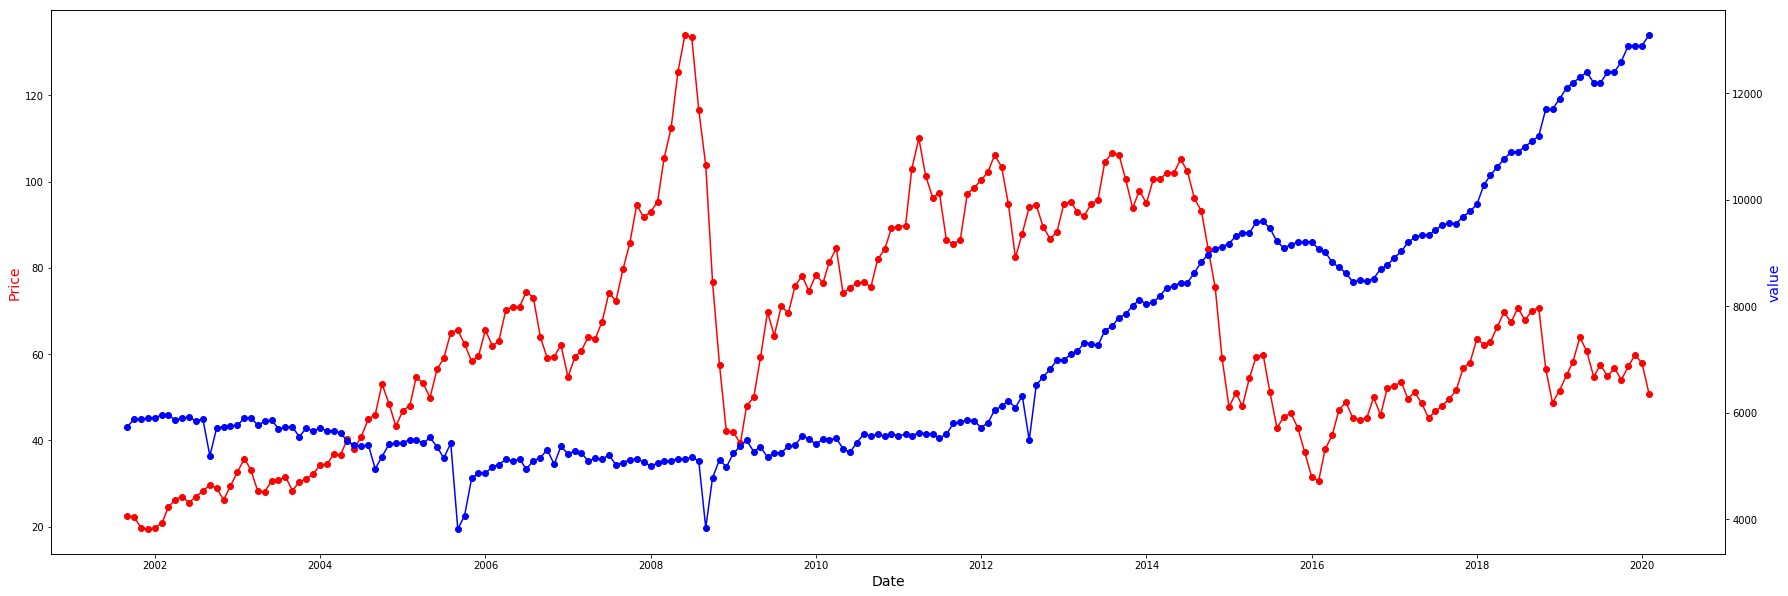

In [312]:
#check table shape
joined_Oil_Production_df.info
#plot the data
show_plot_twoYs (whereNotNull, whereNotNull.index, 'Price', 'value', 'OilProduction')

            value
date             
1959-01-01   1657
1959-02-01   1667
1959-03-01   1620
1959-04-01   1590
1959-05-01   1498


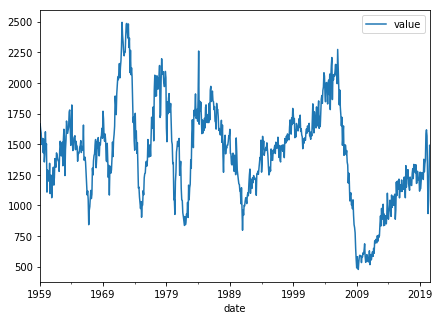

In [313]:
#read in US Housing Starts compare data
strFile = 'housing-starts-historical-chart.csv'
base_path = os.getcwd()
p = base_path + "\\data\\"
dfJoining, intSuccess = read_csv(Path(p,strFile), 'date', '')
if intSuccess == 1:
    print(dfJoining.head())
    dfJoining.plot(figsize=(7,5))
else:
    print('Tough luck sucka')

In [314]:
#inner join on index
joined_Housing_Starts_df= pd.merge(dfCrudePrices, dfJoining, left_index=True, right_index=True, how='inner')
joined_Housing_Starts_df.head() 

,Price,Open,High,Low,Vol.,Change %,value
2020-07-01,39.82,39.84,40.58,39.05,407.17K,1.40%,1492
2020-06-01,35.44,35.21,35.90,34.27,385.71K,-0.14%,1265
2020-05-01,19.78,19.04,20.48,18.07,403.20K,4.99%,1038
2020-04-01,20.31,20.10,21.55,19.90,703.29K,-0.83%,934
2020-01-01,61.33,61.52,61.54,61.33,-,0.44%,1617


In [321]:
#establish correlation
corrrelation    = joined_Housing_Starts_df.corr(method='pearson'); #'kendall', 'spearman', 'pearson'
print("Pearson correlation coefficient:");
print(corrrelation);
#very low correlation; pearson showed the highest; 1 = perfect positive correlation; -1 perfect negative correlation

Pearson correlation coefficient:
          Price      Open      High       Low     value
Price  1.000000  0.998329  0.999191  0.999470 -0.565950
Open   0.998329  1.000000  0.999377  0.999033 -0.569689
High   0.999191  0.999377  1.000000  0.999033 -0.571302
Low    0.999470  0.999033  0.999033  1.000000 -0.563846
value -0.565950 -0.569689 -0.571302 -0.563846  1.000000


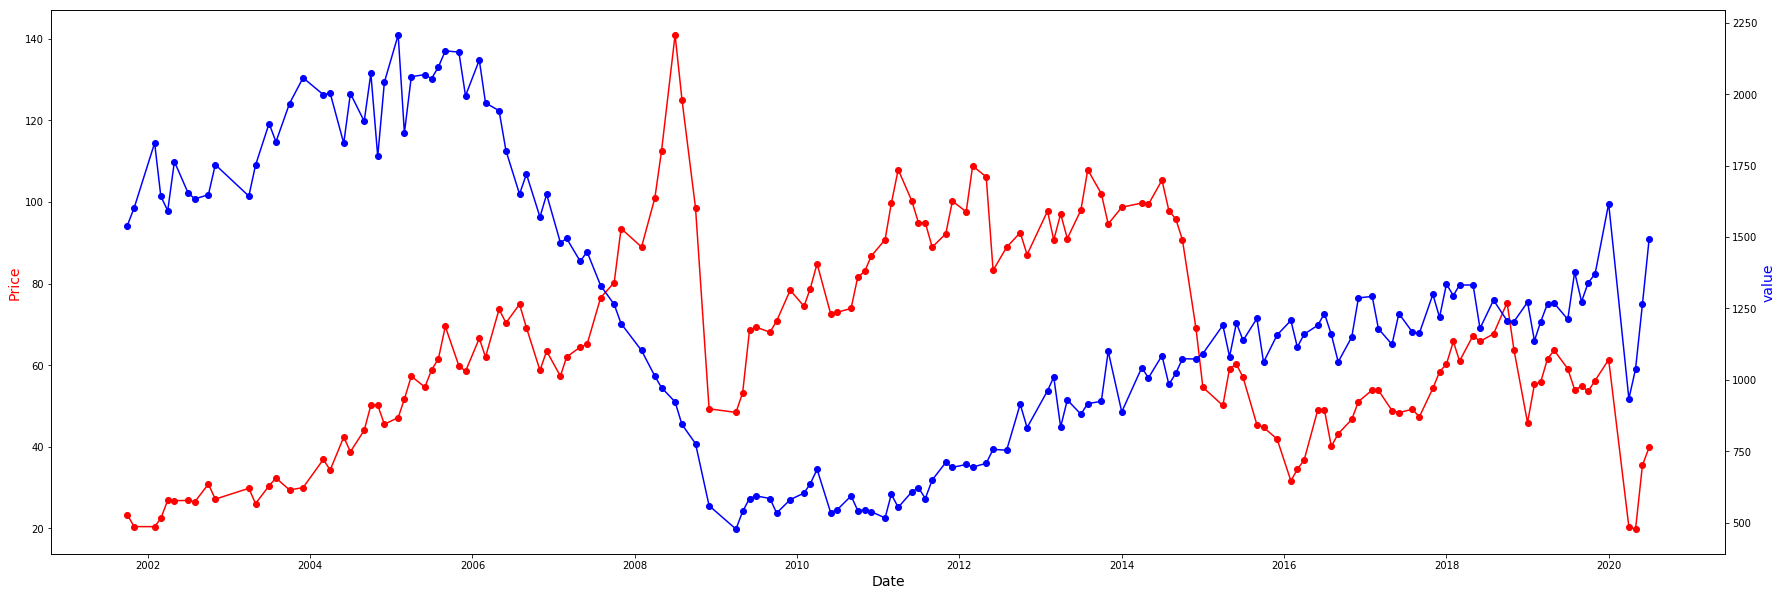

In [315]:
#check table shape
joined_Housing_Starts_df.info
#plot the data
show_plot_twoYs (joined_Housing_Starts_df, joined_Housing_Starts_df.index, 'Price', 'value', 'HousingStarts')

In [316]:
# #bring in oil consumption compare data
# #read in GDP compare data
# strFile = 'OilConsumption.csv'
# base_path = os.getcwd()
# p = base_path + "\\data\\"
# dfJoining, intSuccess = read_csv(Path(p,strFile), 'Date', '-01-01')

# if intSuccess == 1:
#     print(dfJoining.head())
#     dfJoining['World petroleum consumption']=pd.to_numeric(dfJoining['World petroleum consumption'],errors='coerce')
#     dfJoining['U.S. petroleum consumption']=pd.to_numeric(dfJoining['U.S. petroleum consumption'],errors='coerce')
#     dfJoining.plot(figsize=(7,5))
# else:
#     print('Tough luck sucka')

In [317]:
#inner join on index
joined_OilConsumption_df= pd.merge(dfCrudePrices, dfJoining, left_index=True, right_index=True, how='inner')
joined_OilConsumption_df.head(30) 

,Price,Open,High,Low,Vol.,Change %,value
2020-07-01,39.82,39.84,40.58,39.05,407.17K,1.40%,1492
2020-06-01,35.44,35.21,35.90,34.27,385.71K,-0.14%,1265
2020-05-01,19.78,19.04,20.48,18.07,403.20K,4.99%,1038
2020-04-01,20.31,20.10,21.55,19.90,703.29K,-0.83%,934
2020-01-01,61.33,61.52,61.54,61.33,-,0.44%,1617
2019-11-01,56.20,54.15,56.33,54.07,538.12K,3.73%,1371
2019-10-01,53.62,54.28,54.84,53.05,589.18K,-0.83%,1340
2019-09-01,54.80,55.00,55.00,54.56,-,-0.54%,1274
2019-08-01,53.95,57.85,57.99,53.59,886.75K,-7.90%,1377
2019-07-01,59.09,59.27,60.28,58.34,674.89K,1.06%,1212


In [318]:
import numpy as np
date = pd.date_range(start='01/01/1991', periods=13, freq='MS')
df = pd.DataFrame({'date': date, 'amount': np.random.randint(100, 200, date.size)})
df.head()

,date,amount
0,1991-01-01,138
1,1991-02-01,187
2,1991-03-01,158
3,1991-04-01,169
4,1991-05-01,123


In [319]:
df.set_index('date').resample('D').interpolate()
df.head()

,date,amount
0,1991-01-01,138
1,1991-02-01,187
2,1991-03-01,158
3,1991-04-01,169
4,1991-05-01,123
